# **Hacktiv8 Assignment Project 1**

Nama  : Febriansyah Permana

Kelas : KS-18

# **1. Data Preparation**

In [5]:
# Import library
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS
import folium

In [3]:
#upload Dataset

from google.colab import files
uploaded = files.upload()

Saving london_crime_by_lsoa.csv to london_crime_by_lsoa.csv


In [6]:
# Import Dataset
df = pd.read_csv("london_crime_by_lsoa.csv")

# cek 5 teratas dari tabel dataset
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [7]:
# cek 5 terbawah dari tabel dataset
df.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


In [8]:
# Dimensi dataframe
df.shape

(13490604, 7)

In [9]:
# Mendapatkan informasi tentang seluruh nama kolom, jumlah data yang kosong ditiap kolom serta tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [10]:
# Daftar Nama Kolom
df.columns.values

array(['lsoa_code', 'borough', 'major_category', 'minor_category',
       'value', 'year', 'month'], dtype=object)

In [11]:
# Daftar Nama Index
df.index.values

array([       0,        1,        2, ..., 13490601, 13490602, 13490603])

In [12]:
# Describe data untuk mendapatkan statistik deskriptif untuk kolom yang berisi tipe data numerik saja
df.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


In [13]:
# Describe data untuk mendapatkan statistik deskriptif untuk kolom yang berisi tipe data string/objek saja
df.describe(include=object)

,lsoa_code,borough,major_category,minor_category
count,13490604,13490604,13490604,13490604
unique,4835,33,9,32
top,E01003689,Croydon,Theft and Handling,Common Assault
freq,3456,602100,3966300,522180


In [14]:
# Mendapatkan jumlah banyaknya setiap data dengan nama yang berbeda pada setiap kolom
df.nunique()

lsoa_code         4835
borough             33
major_category       9
minor_category      32
value              247
year                 9
month               12
dtype: int64

In [15]:
# Mengetahui isi dari kolom (unique) borough, major category dan minor category
kolom = ['borough', 'major_category', 'minor_category']
for item in kolom:
    print('Nilai Unique Untuk Kolom ', item)
    print(df[item].unique())
    print("="*30)

Nilai Unique Untuk Kolom  borough
['Croydon' 'Greenwich' 'Bromley' 'Redbridge' 'Wandsworth' 'Ealing'
 'Hounslow' 'Newham' 'Sutton' 'Haringey' 'Lambeth' 'Richmond upon Thames'
 'Hillingdon' 'Havering' 'Barking and Dagenham' 'Kingston upon Thames'
 'Westminster' 'Hackney' 'Enfield' 'Harrow' 'Lewisham' 'Brent' 'Southwark'
 'Barnet' 'Waltham Forest' 'Camden' 'Bexley' 'Kensington and Chelsea'
 'Islington' 'Tower Hamlets' 'Hammersmith and Fulham' 'Merton'
 'City of London']
Nilai Unique Untuk Kolom  major_category
['Burglary' 'Violence Against the Person' 'Robbery' 'Theft and Handling'
 'Criminal Damage' 'Drugs' 'Fraud or Forgery' 'Other Notifiable Offences'
 'Sexual Offences']
Nilai Unique Untuk Kolom  minor_category
['Burglary in Other Buildings' 'Other violence' 'Personal Property'
 'Other Theft' 'Offensive Weapon' 'Criminal Damage To Other Building'
 'Theft/Taking of Pedal Cycle' 'Motor Vehicle Interference & Tampering'
 'Theft/Taking Of Motor Vehicle' 'Wounding/GBH' 'Other Theft Person'

# **2.  Data Cleaning**

**2.1 Check for Missing Value**

In [16]:
df.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

**2.1 Check for Duplicating Value**

In [17]:
df[df.duplicated()].sum()

lsoa_code         0.0
borough           0.0
major_category    0.0
minor_category    0.0
value             0.0
year              0.0
month             0.0
dtype: float64

# **3. Visualization**

**3.1 Area Plot**

Quest : tentukan dan bandingkan 5 wilayah dengan total kejahatan terbanyak sepanjang tahun 2008-2016

In [18]:
# Mengelompokkan total data kejahatan berdasarkan wilayah / borough dan tahun / year
df_borough = df.groupby(['borough', 'year'])['value'].sum().reset_index()

# kita dapat membuat data borough menjadi index dengan metode pivot table
df_borough = pd.pivot_table(df_borough, values='value', index='borough', columns='year')

# membuat kolom total untuk mengetahui total kejahatan dari setiap wilayah
df_borough['Total'] = df_borough.sum(axis=1)
df_borough.head()

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
borough,,,,,,,,,,
Barking and Dagenham,17656,17713,17130,16686,15990,15759,15426,16346,16741,149447
Barnet,23944,23449,23416,24007,23573,22510,22572,24036,24684,212191
Bexley,15305,14445,13166,11325,11669,11552,11844,11990,12840,114136
Brent,23504,24748,25512,27669,26357,23759,24426,24883,26693,227551
Bromley,24015,21858,19572,19868,19622,18945,19668,20637,20164,184349


In [19]:
# Urutkan data berdasarkan total masing-masing wilayah dan mengambil 5 total data terbesar
df_5top_borough = df_borough.sort_values(by='Total', ascending=False)[:5]

df_5top_borough.head()

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
borough,,,,,,,,,,
Westminster,47846,48456,48116,54243,59226,53852,47564,47395,48330,455028
Lambeth,31717,31225,31671,33224,33473,31868,31765,33164,34071,292178
Southwark,33470,30623,31320,30723,30737,31128,28912,30260,31636,278809
Camden,32010,31612,31804,33956,31472,28435,27198,29477,29183,275147
Newham,29752,28610,30728,27978,30067,27577,28005,29217,30090,262024


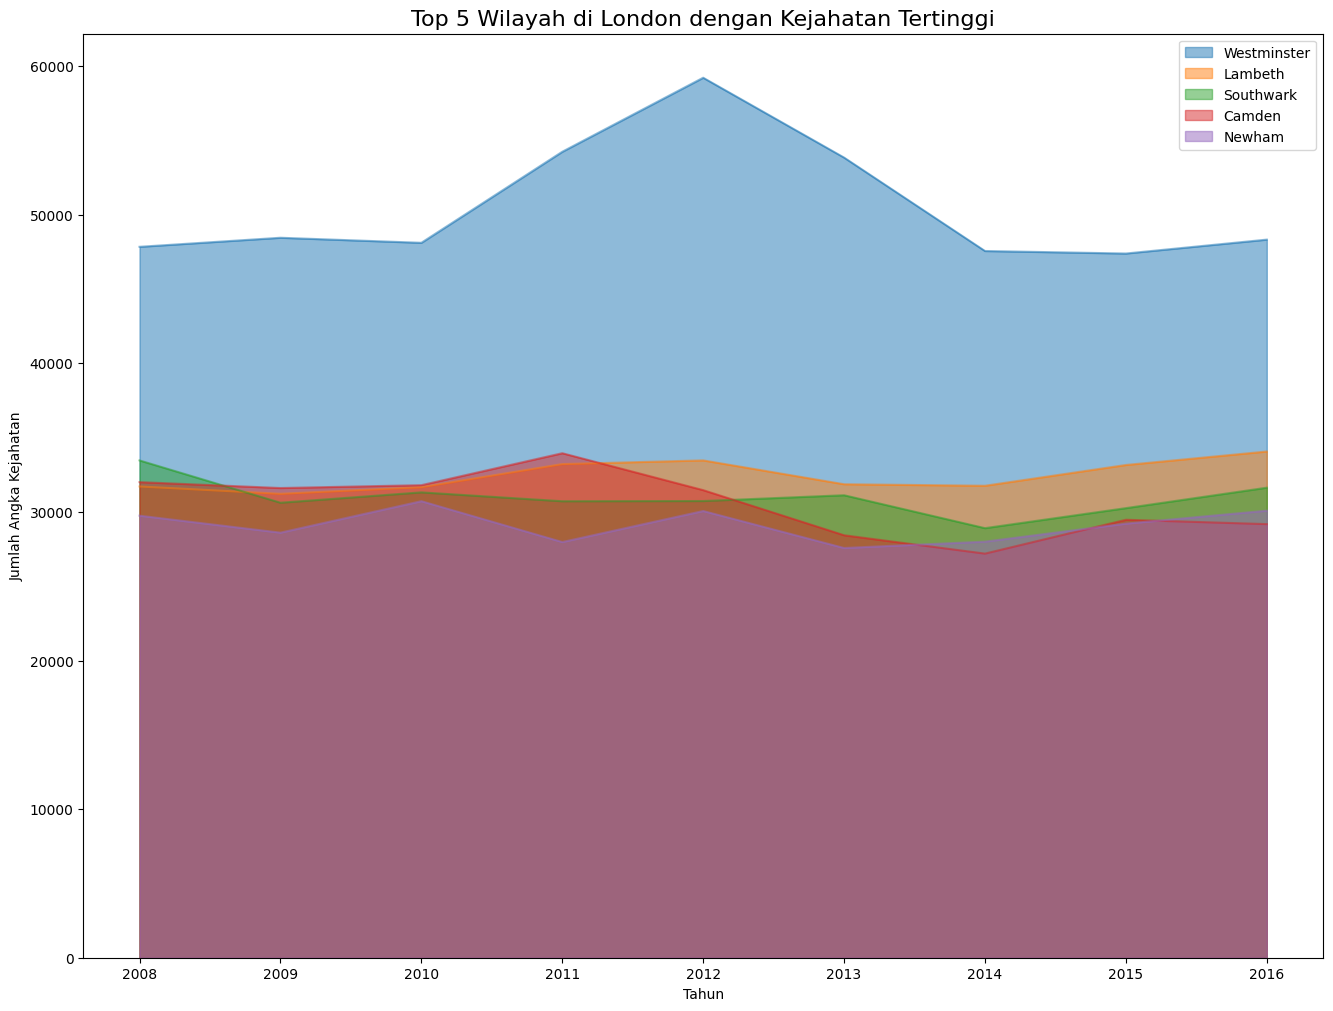

In [20]:
df_5top_borough.drop('Total',axis=1).transpose().plot(kind='area', figsize=(16,12), alpha=0.5, stacked=False)

plt.legend(loc='upper right')
plt.title('Top 5 Wilayah di London dengan Kejahatan Tertinggi', fontsize=16)
plt.xlabel('Tahun')
plt.ylabel('Jumlah Angka Kejahatan')
plt.show()

**Insights**  :

* Wilayah Westminster menjadi wilayah dengan tingkat kejahatan tertinggi di London sejak tahun 2008 sampai 2016
* Pada tahun 2012, di Westminster mencapai puncak jumlah kejahatan dengan total hampir mencapai 60.0000

**3.2 Histogram**

Quest : Bagaimana Persebaran jumlah kejahatan yang terjadi di 5 wilayah dengan kejahatan terbanyak di London pada Tahun 2008 - 2016

In [21]:
# Melakukan transpose index dan column
df_tertinggi = df_5top_borough.drop(columns='Total').transpose()
df_tertinggi

borough,Westminster,Lambeth,Southwark,Camden,Newham
year,,,,,
2008,47846,31717,33470,32010,29752
2009,48456,31225,30623,31612,28610
2010,48116,31671,31320,31804,30728
2011,54243,33224,30723,33956,27978
2012,59226,33473,30737,31472,30067
2013,53852,31868,31128,28435,27577
2014,47564,31765,28912,27198,28005
2015,47395,33164,30260,29477,29217
2016,48330,34071,31636,29183,30090


In [22]:
# Membuat bin untuk histogram
count, bin_edges = np.histogram(df_tertinggi, 15)

In [23]:
print(count)
print(bin_edges)

[ 9 12 13  2  0  0  0  0  0  6  0  0  2  0  1]
[27198.  29333.2 31468.4 33603.6 35738.8 37874.  40009.2 42144.4 44279.6
 46414.8 48550.  50685.2 52820.4 54955.6 57090.8 59226. ]


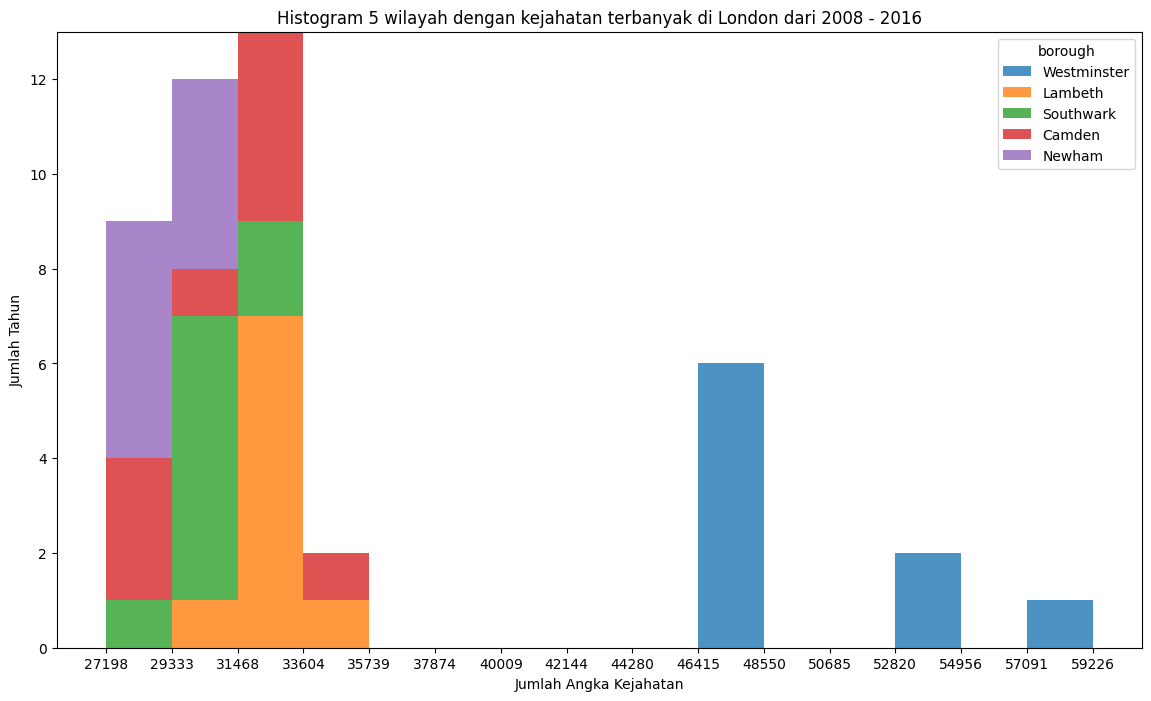

In [24]:
df_tertinggi.plot(kind='hist',
             figsize=(14,8),
             bins = 15,
             alpha=0.8,
             xticks=bin_edges,
             stacked=True,
           )
plt.title('Histogram 5 wilayah dengan kejahatan terbanyak di London dari 2008 - 2016')
plt.ylabel('Jumlah Tahun')
plt.xlabel('Jumlah Angka Kejahatan')
plt.show()

**Insights** :

* Lima data Borough dengan angka kejahatan tertinggi di London dari 2008-2016 yaitu Westminster, Lambeth, Southwark, Camden dan Newham
* Persebaran data kejahatan tertinggi berada pada daerah Westminster yaitu dimulai dari angka 46.415-an pertahun, sedangkan 4 Borough lainnya berada dikisaran 27.198 sampai dengan 35.739.

**3.3 Bar Chart**

Quest : Bagaimana persebaran angka kejahatan perbulan di tahun 2016 di London?

In [25]:
# Mengelompokan data di tahun 2016 berdasarkan major category dan month
df_month = df[df['year'] == 2016].groupby(['major_category', 'month'])['value'].sum().reset_index()

# Membuat data month menjadi index dengan metode pivot table
df_month = pd.pivot_table(df_month, values='value', index='month', columns='major_category')

# Untuk mengetahui total angka kejahatan perbulan, dibuat kolom total
df_month['Total'] = df_month.sum(axis=1)
df_month

major_category,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person,Total
month,,,,,,,,,,
1,6302,5049,3828,0,1276,1810,0,22316,18266,58847
2,5841,5010,3397,0,1133,1646,0,22028,17642,56697
3,5804,5092,3324,0,1256,1711,0,23117,18863,59167
4,5335,5224,3389,0,1302,1570,0,23149,18668,58637
5,5404,5967,3276,0,1543,1787,0,25374,20639,63990
6,5381,5338,3041,0,1432,1885,0,24722,20463,62262
7,5387,5773,3372,0,1457,1960,0,25837,21733,65519
8,5406,5584,3442,0,1386,1910,0,25176,19762,62666
9,5280,5210,3091,0,1318,1980,0,24999,19534,61412


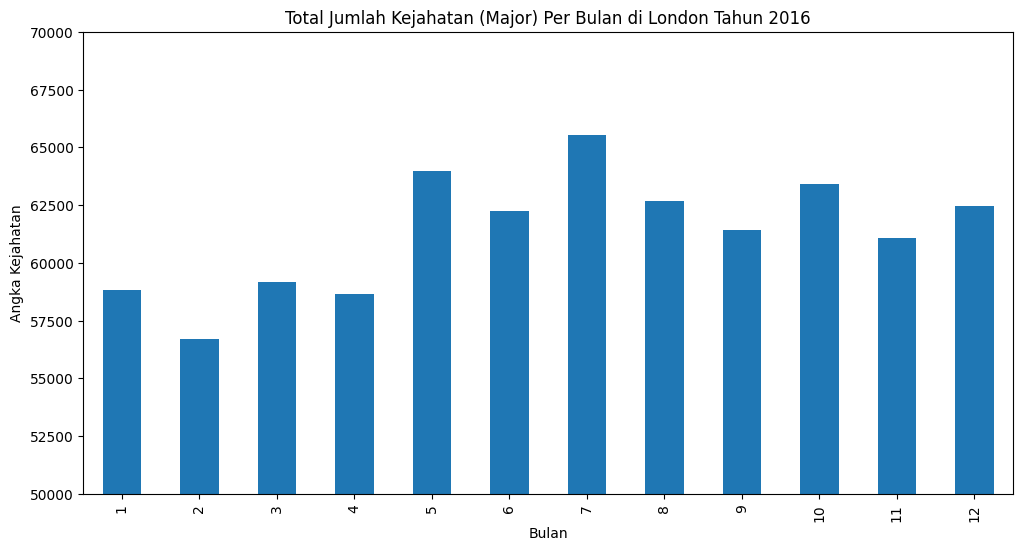

In [26]:
# Membuat bar chart berdasarkan total angka kejahatan perbulan di tahun 2016
df_month['Total'].plot(kind='bar', figsize=(12,6))

plt.ylim(50000,70000)
plt.title('Total Jumlah Kejahatan (Major) Per Bulan di London Tahun 2016')
plt.xlabel('Bulan')
plt.ylabel('Angka Kejahatan')

plt.show()

**Insights** :

* kejahatan tertinggi di tahun 2016 terjadi di Bulan Juli
* Angka kejahatan terendah di tahun 2016 terjadi di Bulan Februari

**3.4 Pie Chart**

Quest : Bandingkan persentase total kejahatan yang terjadi di London selama kurun waktu 2008 - 2016

In [27]:
# Mengelompokan berdasarkan major_category
df_major_category = df.groupby('major_category', axis=0).sum()
df_major_category

<ipython-input-27-4bb388a87b4c>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_major_category = df.groupby('major_category', axis=0).sum()


,value,year,month
major_category,,,
Burglary,754293,2099731248,6783426
Criminal Damage,630938,4163174064,13449618
Drugs,470765,2373089616,7666542
Fraud or Forgery,5325,475878240,1537380
Other Notifiable Offences,106349,1561923648,5045976
Robbery,258873,1890040608,6105996
Sexual Offences,1273,217513296,702702
Theft and Handling,2661861,7980195600,25780950
Violence Against the Person,1558081,6381548928,20616336


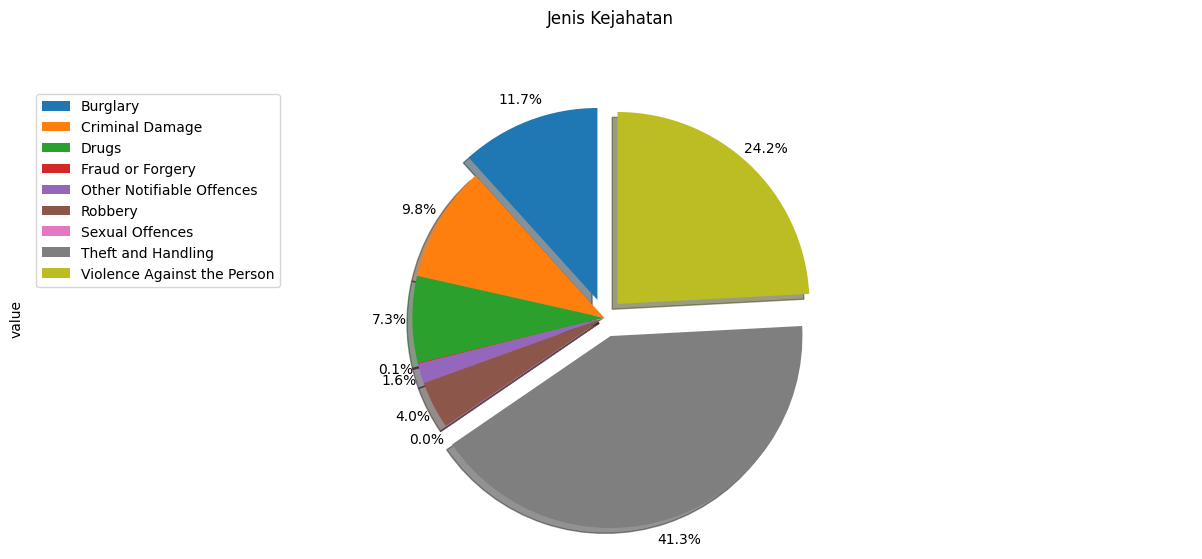

In [28]:
# Explode
explode_list = [0.1, 0, 0, 0, 0, 0, 0, 0.1, 0.1]

# Membuat pie chart berdasarkan total angka kejahatan dari tahun 2008-2016
df_major_category['value'].plot(kind='pie',figsize=(15, 6),autopct='%1.1f%%',startangle=90,shadow=True,labels=None,pctdistance=1.12,explode=explode_list)

plt.title('Jenis Kejahatan', y=1.12)
plt.axis('equal')
plt.legend(labels=df_major_category.index, loc='upper left')
plt.show()

**Insights** :

* Theft and Handliing menjadi Kasus Kejahatan yang paling banyak terjadi di London sepanjang tahun 2008 - 2016
* Disusul dengan Violence against the person di urutan kedua, dan perbadingannya dengan angka kejahatan di bawahnya cukup jauh
* Sementara, Kasus Sexual Offences tidak pernah terjadi sepanjang tahun 2008-2016

**3.5  Box Plot**

Quest : Bagaimana angka persebaran di Wilayah Westminser sebagai daerah dengan tingkat Kejahatan tertinggi di London?

In [29]:
# Urutkan data untuk menemukan data Borough dengan kasus kejahatan terbanyak
df_borough.sort_values(by='Total', ascending=False).head()

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
borough,,,,,,,,,,
Westminster,47846,48456,48116,54243,59226,53852,47564,47395,48330,455028
Lambeth,31717,31225,31671,33224,33473,31868,31765,33164,34071,292178
Southwark,33470,30623,31320,30723,30737,31128,28912,30260,31636,278809
Camden,32010,31612,31804,33956,31472,28435,27198,29477,29183,275147
Newham,29752,28610,30728,27978,30067,27577,28005,29217,30090,262024


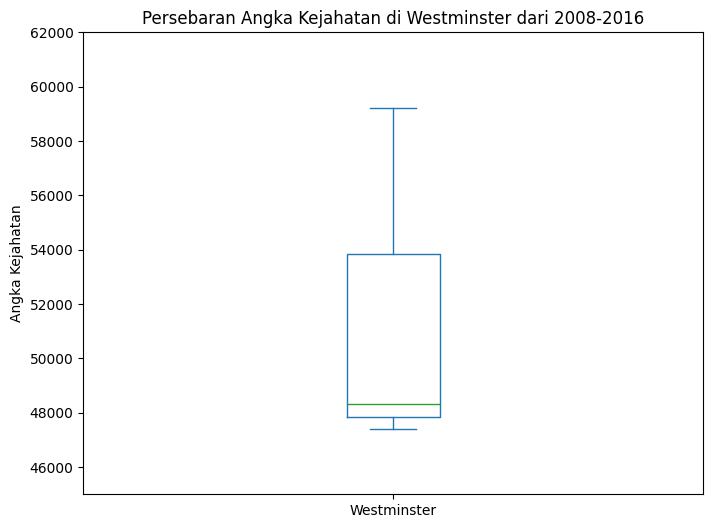

In [30]:
# Membuat box plot
df_borough.drop(columns='Total').loc['Westminster'].plot(kind='box',figsize=(8,6))

plt.ylim(45000,62000)
plt.title('Persebaran Angka Kejahatan di Westminster dari 2008-2016')
plt.ylabel('Angka Kejahatan')
plt.show()

**Insights**  :

* Jumlah angka kejahatan tertinggi di Westminster mencapai hampir 60.000
* Jumlah angka kejahatan terendah di Westminster mencapai 47.000-an
* Nilai median berada di angka 48.000-an
Jumlah angka kejahatan yang sering terjadi pertahunnya berada diantara 48.000-an sampai 54.000-an

**3.6 Scatter Plot**

Quest : Bagaimana trend jumlah angka kejahatan setiap tahun selama kurun waktu 2008 - 2016

In [31]:
# Mengelompokan berdasarkan tahun
df_year = df.groupby(['year']).sum()['value']
df_year

<ipython-input-31-53556a608e54>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_year = df.groupby(['year']).sum()['value']


year
2008    738641
2009    717214
2010    715324
2011    724915
2012    737329
2013    686407
2014    680183
2015    711624
2016    736121
Name: value, dtype: int64

Text(0, 0.5, 'Jumlah Angka Kejahatan')

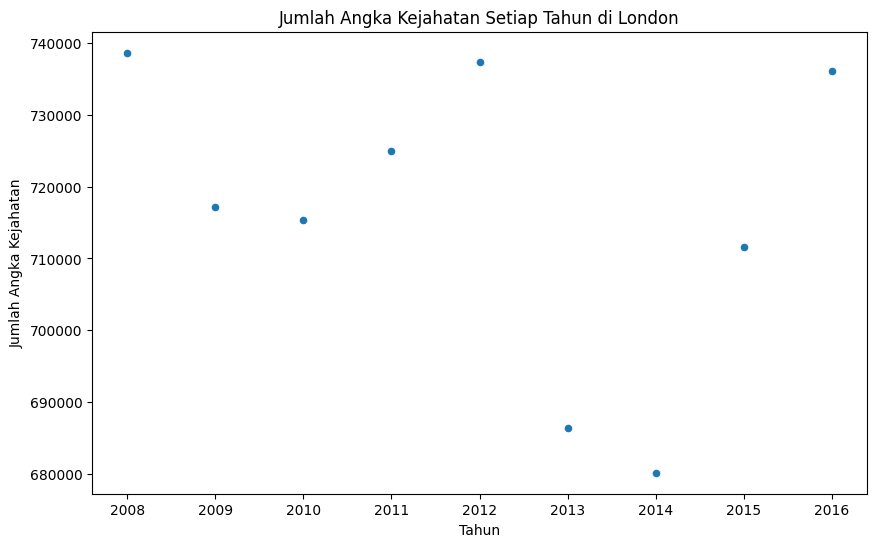

In [32]:
# Membuat scatter plot
pd.DataFrame(df_year).reset_index().plot(kind='scatter',x='year',y='value', figsize=(10, 6))

plt.title('Jumlah Angka Kejahatan Setiap Tahun di London')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Angka Kejahatan')

**Insights**  :

* Tahun 2008, 2012, dan 2016 menjadi tahun terbanyak terjadinya kasus kejahatan di London
* Tahun 2014 dan 2013 menjadi tahun terendah terjadinya kasus kejahatan di London

**3.7 Word Clouds**

Quest : Wilayah apa yang memiliki kasus kejahatan terbanyak di London dalam kurun waktu 2008 - 2016?

In [33]:
# Mengambil data total kejahatan
total_crime = df_borough['Total'].sum()

# Membuat batasan maximum word
max_words = 90

# Membuat wordstring
word_string = ''

# Mengisi wordstring
for borough in df_borough.index.values:

    # Memisahkan kata yang terdiri dari 2 kata atau lebih
    if len(borough.split(' ')) == 1:
        # Menghitung banyaknya kata
        repeat_num_times = int(df_borough.loc[borough,'Total']/float(total_crime)*max_words)
        # Mengisi wordstring kata sebanyak berapa kali munculnya
        word_string = word_string + ((borough + ' ')* repeat_num_times)

wordcloud = WordCloud(background_color='white').generate(word_string)

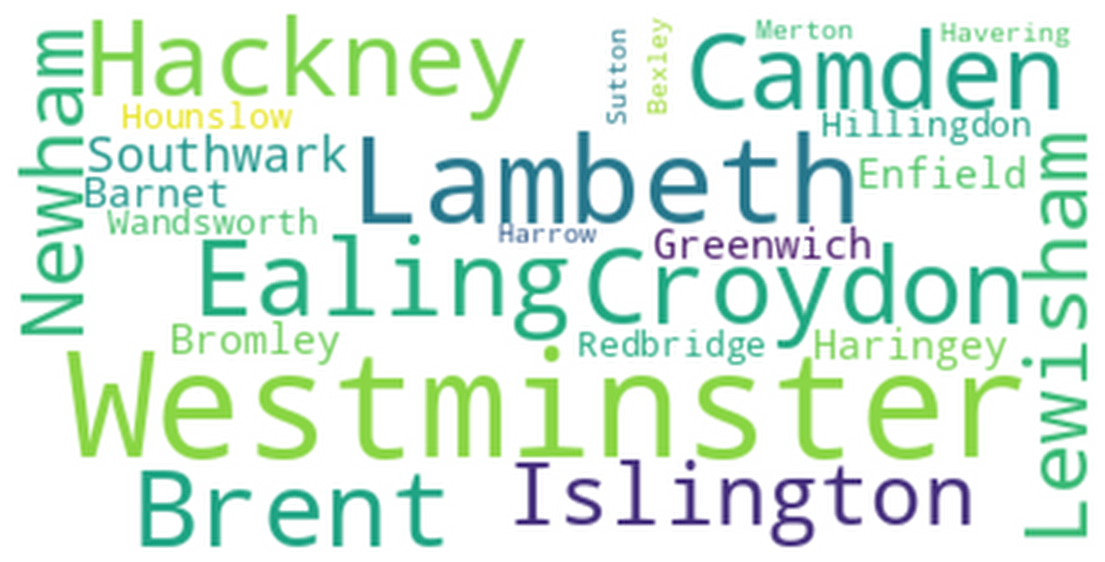

In [34]:
# Memvisualisasikan wordcloud
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation='bessel')
plt.axis('off')
plt.show()

**Insights** :

* Wilayah Westminster menjadi penyumbang angka kejahatan terbanyak di London dalam kurun waktu 2008-2016

**3.8  Folium Maps**

Quest : London Maps menggunakan Folium

In [35]:
latitude = 51.494720
longitude = 0.135278

westminster_map = folium.Map(location=[latitude,longitude], zoom_start=8)

westminster_map

# **4. Overall Analysis**

Setelah melakukan berbagai macam analysis dan visualisasi, dimulai dari area plot, histogram, bar chart, pie chart, box plot, scatter plot, word cloud, dan folium maps dari dataset kejahatan di London pada kurun waktu 2008 - 2016, saya mencatat beberapa poin penting yang dapat di ambil :

* Lima data Borough/wilayah dengan angka kejahatan tertinggi di London dari 2008-2016 yaitu Westminster, Lambeth, Southwark, Camden dan Newham

* Theft and Handliing menjadi Kasus Kejahatan yang paling banyak terjadi di London sepanjang tahun 2008 - 2016

* Disusul dengan Violence against the person di urutan kedua, dan perbadingannya dengan angka kejahatan di bawahnya cukup jauh

* Sementara, Kasus Sexual Offences tidak pernah terjadi sepanjang tahun 2008-2016

* Wilayah Westminster menjadi wilayah dengan tingkat kejahatan tertinggi di London sejak tahun 2008 sampai 2016

* Pada tahun 2012, di Westminster mencapai puncak jumlah kejahatan dengan total hampir mencapai 60.0000 kasus

* Jika kita menelusuri lebih jauh tentang wilayah Westminster, Jumlah angka kejahatan tertinggi di Westminster mencapai hampir 60.000 dan jumlah angka kejahatan terendah di Westminster mencapai 47.000-an. Serta Jumlah angka kejahatan yang sering terjadi pertahunnya berada diantara 48.000-an sampai 54.000-an kasus

* Tahun 2008, 2012, dan 2016 menjadi tahun terbanyak terjadinya kasus kejahatan di London

* Tahun 2014 dan 2013 menjadi tahun terendah terjadinya kasus kejahatan di London

* Jika kita menelusuri lebih jauh di Tahun 2016, angka kejahatan tertinggi di tahun 2016 terjadi di Bulan Juli dan angka kejahatan terendah di tahun 2016 terjadi di Bulan Februari